# Anime Recommender System

### 


© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>


---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

#### Data Description


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>


---

In [2]:
anime_df= pd.read_csv('anime.csv')
submission_df = pd.read_csv('submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
anime_df.describe()

anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

In [4]:
anime_df.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [17]:
train_df.head()

user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8

In [30]:
submission_df.head()

ID  rating
0  14862_1232     5.3
1  14862_7974     4.0
2  24873_2349     6.0

In [34]:
test_df.head()

user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

---

In [6]:
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

<AxesSubplot:>

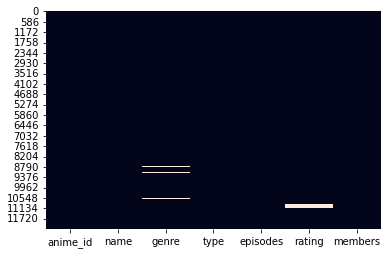

In [7]:
sns.heatmap(anime_df.isnull(), cbar=False)

In [8]:
anime_df = anime_df.dropna()

In [9]:
anime_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [10]:
# Check for duplicate rows
duplicates = anime_df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


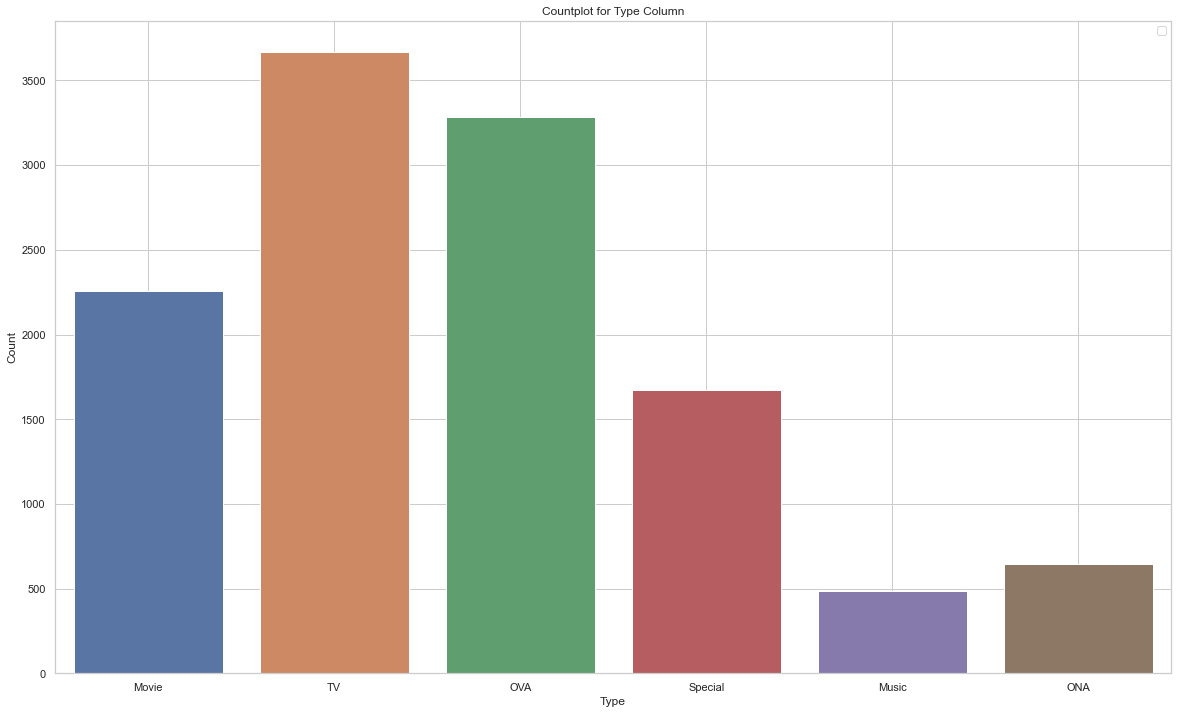

In [11]:
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(20, 12))
sns.countplot(x='type', data=anime_df)

# Adding titles and labels
plt.title('Countplot for Type Column')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

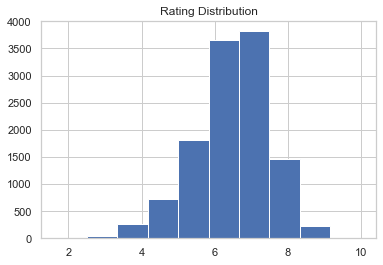

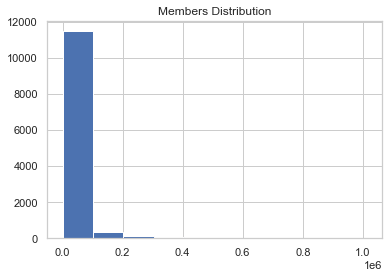

In [12]:
# Data distribution
anime_df['rating'].hist()
plt.title('Rating Distribution')
plt.show()
anime_df['members'].hist()
plt.title('Members Distribution')
plt.show()

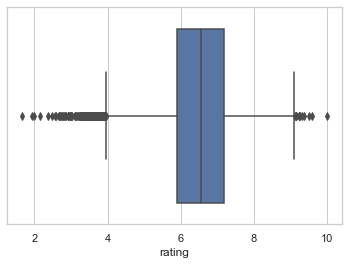

In [13]:
# Box plots for outliers
sns.boxplot(x=anime_df['rating'])
plt.show()

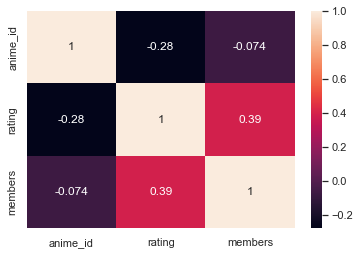

In [14]:
# Correlation analysis
corr_matrix = anime_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

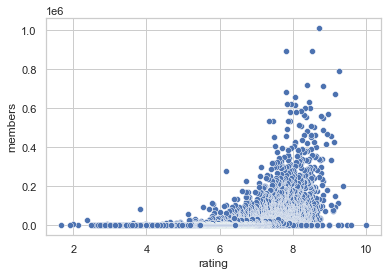

In [15]:
# Relationships between variables
sns.scatterplot(x='rating', y='members', data=anime_df)
plt.show()


In [22]:
# Genre analysis
#sns.boxplot(x='genre', y='rating', data=anime_df)
#plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

---


In [27]:
# Aggregate duplicate entries by taking the mean rating
train_df = train_df.groupby(['user_id', 'anime_id']).rating.mean().reset_index()
train_df.head()

user_id  anime_id  rating
0        1     11617    10.0
1        1     11757    10.0
2        1     15451    10.0
3        2     11771    10.0
4        3        20     8.0

In [19]:
# Create a user-item matrix
user_item_matrix = train_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)

In [33]:
user_item_matrix.head()

anime_id  1      5      6      7      8      15     16     17     18     \
user_id                                                                   
1           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5           0.0    0.0    8.0    0.0    0.0    6.0    0.0    6.0    6.0   
7           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

anime_id  19     ...  34238  34239  34240  34252  34283  34324  34325  34349  \
user_id          ...                                                           
1           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7           0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

anime_id  34367  34475  
user_id                 
1           0.0    0.0  
2           0.0    0.0  
3           0.0    0.0  
5           0.0    0.0  
7           0.0    0.0  

[5 rows x 9838 columns]

In [20]:
# Fit the NearestNeighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [36]:
# Function to get recommendations for a specific user
def get_recommendations(user_id, num_recommendations=10):
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in training data.")
        return []
    
    user_index = user_item_matrix.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=num_recommendations+1)
    
    recommendations = []
    for i in range(1, len(distances.flatten())):
        if indices.flatten()[i] < len(user_item_matrix.columns):
            anime_id = user_item_matrix.columns[indices.flatten()[i]]
            predicted_rating = distances.flatten()[i]
            recommendations.append({'anime_id': anime_id, 'predicted_rating': predicted_rating})
        else:
            print(f"Index {indices.flatten()[i]} is out of bounds for axis 0 with size {len(user_item_matrix.columns)}")
    return recommendations


In [29]:
# Example usage
user_id = 3
recommendations = get_recommendations(user_id)
print(f"Top recommendations for user {user_id}: {recommendations}")

Index 13149 is out of bounds for axis 0 with size 9838
Index 44337 is out of bounds for axis 0 with size 9838
Index 40701 is out of bounds for axis 0 with size 9838
Index 11500 is out of bounds for axis 0 with size 9838
Index 20030 is out of bounds for axis 0 with size 9838
Index 34739 is out of bounds for axis 0 with size 9838
Index 36069 is out of bounds for axis 0 with size 9838
Index 17095 is out of bounds for axis 0 with size 9838
Index 58994 is out of bounds for axis 0 with size 9838
Top recommendations for user 3: [30826]


In [37]:
# Create an empty list to store all recommendations
all_recommendations = []

# Iterate through all user_ids in test_df and get recommendations
for user_id in test_df['user_id']:
    recommendations = get_recommendations(user_id)
    for rec in recommendations:
        all_recommendations.append({'user_id': user_id, 'anime_id': rec['anime_id'], 'rating': rec['predicted_rating']})

# Convert the list of all recommendations to a DataFrame
all_recommendations_df = pd.DataFrame(all_recommendations)

# Add an index column
all_recommendations_df.reset_index(inplace=True)
all_recommendations_df.rename(columns={'index': 'ID'}, inplace=True)

# Print the DataFrame in the desired format
print(all_recommendations_df.to_string(index=False, header=True))


Index 26265 is out of bounds for axis 0 with size 9838
Index 44395 is out of bounds for axis 0 with size 9838
Index 53849 is out of bounds for axis 0 with size 9838
Index 25026 is out of bounds for axis 0 with size 9838
Index 29074 is out of bounds for axis 0 with size 9838
Index 30569 is out of bounds for axis 0 with size 9838
Index 25539 is out of bounds for axis 0 with size 9838
Index 43727 is out of bounds for axis 0 with size 9838
Index 53628 is out of bounds for axis 0 with size 9838
Index 11737 is out of bounds for axis 0 with size 9838
Index 37667 is out of bounds for axis 0 with size 9838
Index 63761 is out of bounds for axis 0 with size 9838
Index 21636 is out of bounds for axis 0 with size 9838
Index 64723 is out of bounds for axis 0 with size 9838
Index 20772 is out of bounds for axis 0 with size 9838
Index 56988 is out of bounds for axis 0 with size 9838
Index 43402 is out of bounds for axis 0 with size 9838
Index 66321 is out of bounds for axis 0 with size 9838
Index 5626

KeyboardInterrupt: 

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>



---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>
---


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
